<a href="https://colab.research.google.com/github/EdwFa/xml_AIDoc/blob/master/%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B8_%D0%B2_AIDoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Моделируем конкурс по бинарной диагностике

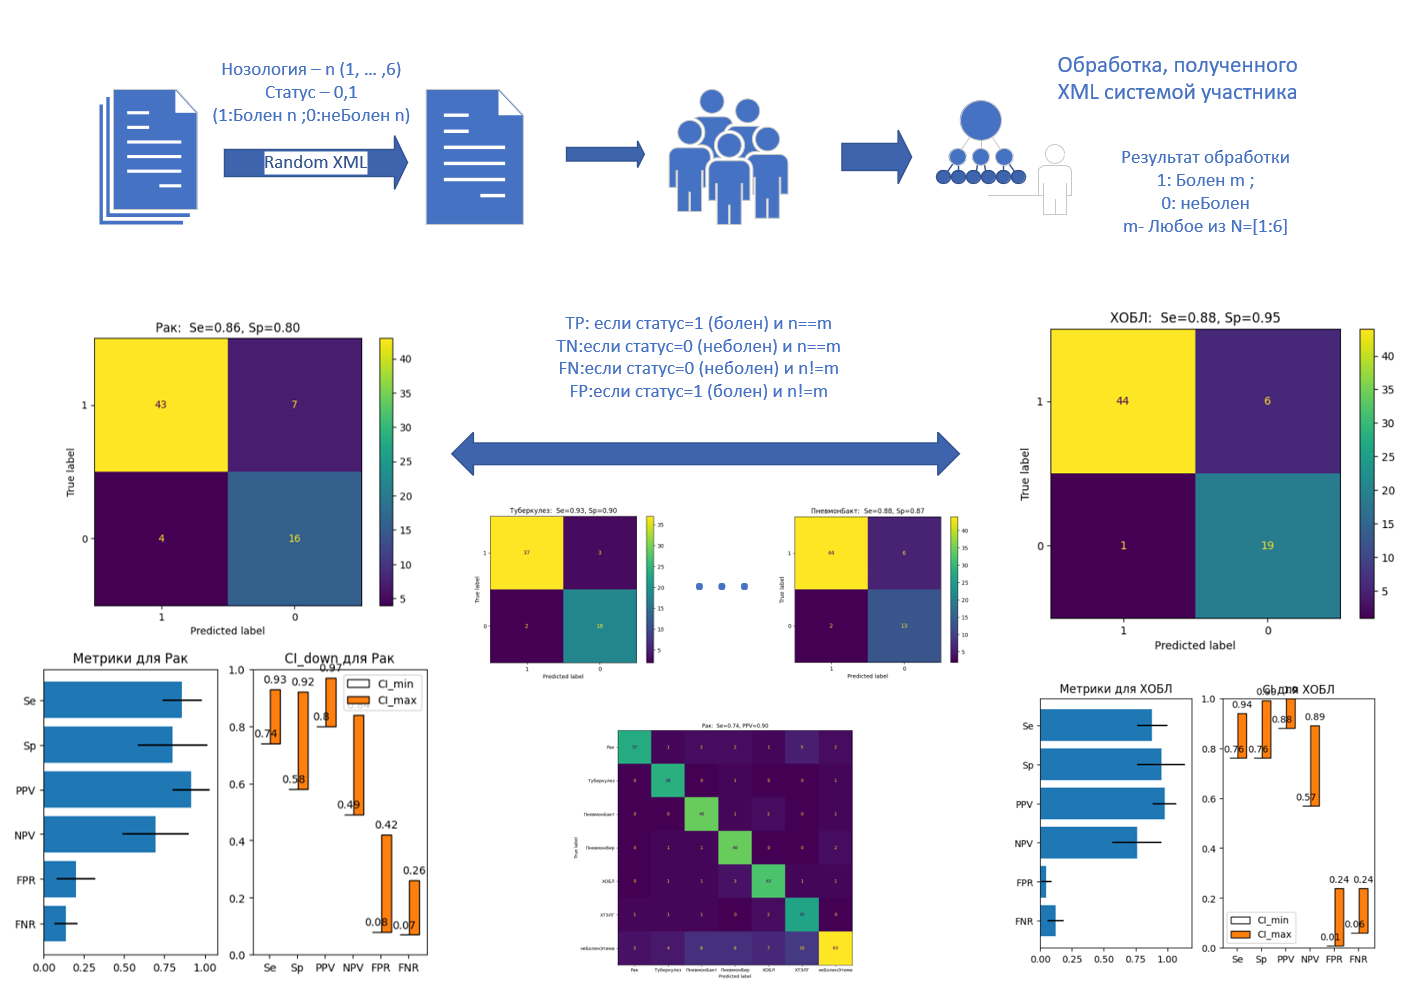

In [1]:
from sklearn.metrics import ConfusionMatrixDisplay
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# N = 10 # количество команд участников
DES = ['Рак','Туберкулез','ПневмонБакт','ПневмонВир','ХОБЛ','ХТЭЛГ'] # нозологии конкурса
SIZE_POSITIVE = [50, 40, 50, 50, 50, 40] # размеры выборок по нозологиям
SIZE_NEGATIVE = [20, 20, 15, 15, 20, 10]
# технологические барьеры
SE = {
    'Рак': 0.86,
    'Туберкулез': 0.92,
    'ПневмонБакт': 0.90,
    'ПневмонВир': 0.92,
    'ХОБЛ': 0.86,
    'ХТЭЛГ': 0.84
}
SP = {
    'Рак': 0.76,
    'Туберкулез': 0.82,
    'ПневмонБакт': 0.80,
    'ПневмонВир': 0.82,
    'ХОБЛ': 0.76,
    'ХТЭЛГ': 0.74
}

In [3]:
# генерируем датасет испытаний
xml = []

i=0
for ds in DES:
  a = [ds] * SIZE_POSITIVE[i]
  xml += a
  a = ['не'+ds] * SIZE_NEGATIVE[i]
  xml += a
  i += 1

N_xml = len(xml)
random.shuffle(xml) # перемешиваем случайно его, для последовательных извлечений xml и подачи на вход СППВР
print(len(xml), xml)

380 ['ПневмонБакт', 'ХОБЛ', 'ПневмонБакт', 'Рак', 'ПневмонБакт', 'неПневмонВир', 'ХОБЛ', 'ХОБЛ', 'ХОБЛ', 'неПневмонБакт', 'ХТЭЛГ', 'неХОБЛ', 'ХОБЛ', 'ПневмонВир', 'ПневмонВир', 'неПневмонВир', 'неРак', 'неРак', 'неПневмонВир', 'ПневмонБакт', 'ПневмонВир', 'неТуберкулез', 'Рак', 'неПневмонБакт', 'ХТЭЛГ', 'ПневмонБакт', 'ХОБЛ', 'неТуберкулез', 'Туберкулез', 'ПневмонБакт', 'неТуберкулез', 'ХТЭЛГ', 'ПневмонВир', 'ХОБЛ', 'ПневмонБакт', 'неПневмонБакт', 'Рак', 'неТуберкулез', 'неХОБЛ', 'неХОБЛ', 'неХТЭЛГ', 'Туберкулез', 'неПневмонБакт', 'ПневмонБакт', 'ХТЭЛГ', 'Рак', 'неРак', 'ПневмонБакт', 'ПневмонВир', 'неХОБЛ', 'ПневмонБакт', 'неПневмонВир', 'ХОБЛ', 'ХОБЛ', 'неПневмонБакт', 'неРак', 'Рак', 'ПневмонБакт', 'Рак', 'ХТЭЛГ', 'ПневмонВир', 'ПневмонБакт', 'неРак', 'ХТЭЛГ', 'ХОБЛ', 'ПневмонВир', 'Туберкулез', 'ПневмонВир', 'ПневмонБакт', 'неХТЭЛГ', 'неТуберкулез', 'ПневмонВир', 'ПневмонБакт', 'ПневмонВир', 'ХОБЛ', 'ХОБЛ', 'Туберкулез', 'Рак', 'Туберкулез', 'ХОБЛ', 'неРак', 'ХОБЛ', 'ПневмонВир', '

In [4]:
TP = dict.fromkeys(DES, 0)
TN = dict.fromkeys(DES, 0)
FP = dict.fromkeys(DES, 0)
FN = dict.fromkeys(DES, 0)
Sens = dict.fromkeys(DES, 0)
Spec = dict.fromkeys(DES, 0)

sppr = {
    'desiase': [],
    'fact': [],
    'pred': []
}

pr=0 # печатать ли вывод
i=0
for x in xml: # подаем последовательно на вход эпикризы и оцениваем точность диагностики
  # проверяем этот эпикриз с болезнью или нет
  i +=1
  if x in SE: # болен, оцениваем чувствительность
    se = SE.get(x)
    sppr['desiase'].append(x)
    res = random.choices(['Болен', 'неБолен'], weights=[100*se, 100*(1-se)]) # моделируем вероятность выявления заболевания по чувствительности
    if res[0] == 'неБолен':
      FN[x] += 1
      sppr['pred'].append(0)
      sppr['fact'].append(1)
    else:
      TP[x] += 1
      sppr['pred'].append(1)
      sppr['fact'].append(1)
    if pr :
      print(i," Пациент с заболеванием - ", x, " диагностирован как - ", res[0])
  else: # неБолен, оцениваем специфичность
    sp = SP.get(x[2:])
    sppr['desiase'].append(x[2:])
    res = random.choices(['неБолен', 'Болен'], weights=[100*sp, 100*(1-sp)]) # моделируем вероятность верного выявления НЕБОЛЕН по специфичности
    if res[0] == 'Болен':
      FP[x[2:]] += 1
      sppr['pred'].append(1)
      sppr['fact'].append(0)
    else:
      TN[x[2:]] += 1
      sppr['pred'].append(0)
      sppr['fact'].append(0)
    if pr :
      print(i, " Пациент без заболевания - ", x, " диагностирован системой как - ", res[0])

print("TP - ", TP)
print("FN - ", FN)
print("TN - ", TN)
print("FP - ", FP)

for d in DES:
  Sens[d] = TP[d]/(TP[d]+FN[d])
  Spec[d] = TN[d]/(TN[d]+FP[d])

print("Чувствительность :", Sens)
print("Cпецифичность :", Spec)


TP -  {'Рак': 40, 'Туберкулез': 37, 'ПневмонБакт': 40, 'ПневмонВир': 43, 'ХОБЛ': 47, 'ХТЭЛГ': 35}
FN -  {'Рак': 10, 'Туберкулез': 3, 'ПневмонБакт': 10, 'ПневмонВир': 7, 'ХОБЛ': 3, 'ХТЭЛГ': 5}
TN -  {'Рак': 12, 'Туберкулез': 14, 'ПневмонБакт': 12, 'ПневмонВир': 10, 'ХОБЛ': 14, 'ХТЭЛГ': 8}
FP -  {'Рак': 8, 'Туберкулез': 6, 'ПневмонБакт': 3, 'ПневмонВир': 5, 'ХОБЛ': 6, 'ХТЭЛГ': 2}
Чувствительность : {'Рак': 0.8, 'Туберкулез': 0.925, 'ПневмонБакт': 0.8, 'ПневмонВир': 0.86, 'ХОБЛ': 0.94, 'ХТЭЛГ': 0.875}
Cпецифичность : {'Рак': 0.6, 'Туберкулез': 0.7, 'ПневмонБакт': 0.8, 'ПневмонВир': 0.6666666666666666, 'ХОБЛ': 0.7, 'ХТЭЛГ': 0.8}


In [5]:
df = pd.DataFrame(sppr)
df

,desiase,fact,pred
0,ПневмонБакт,1,1
1,ХОБЛ,1,1
2,ПневмонБакт,1,1
3,Рак,1,0
4,ПневмонБакт,1,1
...,...,...,...
375,Рак,0,1
376,ПневмонВир,1,1
377,Рак,1,1
378,Рак,0,0


Доверительные интервалы для Se и Sp

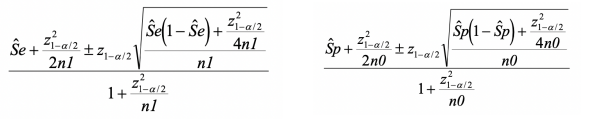

In [6]:
def confidence_interval(s, n, z):
  down = (s + z*z/(2*n) - z*math.sqrt((s*(1-s)+z*z/(4*n))/n))/(1+z*z/n)
  up = (s + z*z/(2*n) + z*math.sqrt((s*(1-s)+z*z/(4*n))/n))/(1+z*z/n)
  return down, up

С поправкой на непрерывность

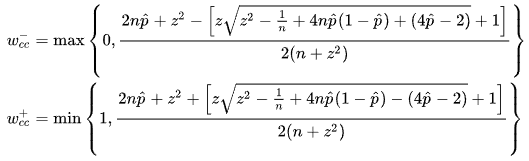

In [7]:
def ci_wilson(s, n, z):
  down = 2*n*s + z*z - 1 - z*math.sqrt(z*z-(1/n)+4*n*s*(1-s)+(4*s-2))
  down /= (2*(n+z*z))
  down = max(0,down)
  up = 2*n*s + z*z + 1 + z*math.sqrt(z*z-(1/n)+4*n*s*(1-s)+(4*s-2))
  up /= (2*(n+z*z))
  up = min(1,up)
  return down,up



In [8]:
Z_Alpha = {
    '90%':  1.64,
    '95%':  1.96,
    '99%':  2.58
}

In [9]:
d,u = confidence_interval(1,35,1.96)
print(d,u)

0.9010957324106112 1.0


In [10]:
d,u = ci_wilson(1,35,1.96)
print(d, u)

0.8768433364692324 1


In [11]:

# list of Se, Numb, CI_min
SE = []
CI_MIN = []
N = []
ERR = []

t=35
er_max=10
while (t<101):
  er=0
  while(er<er_max):
    se = (t-er)/t
    d,u = confidence_interval(se,t,1.96)
    SE.append(se)
    CI_MIN.append(d)
    N.append(t)
    ERR.append(er)
    er += 1
  t += 3

dict = {'Err': ERR, 'Numb': N, 'CI_min': CI_MIN, 'Se': SE}
df_ = pd.DataFrame(dict)
df_

,Err,Numb,CI_min,Se
0,0,35,0.901096,1.000000
1,1,35,0.854666,0.971429
2,2,35,0.813926,0.942857
3,3,35,0.776204,0.914286
4,4,35,0.740482,0.885714
...,...,...,...,...
215,5,98,0.886074,0.948980
216,6,98,0.872808,0.938776
217,7,98,0.859838,0.928571
218,8,98,0.847116,0.918367


In [12]:
import plotly.express as px
fig = px.line(df_, x='Numb', y='CI_min', color='Err', markers=True)
fig.show()

In [13]:
import plotly.express as px
fig = px.line(df_, x='Numb', y='Se', color='Err', markers=True)
fig.show()

In [14]:
import plotly.express as px
fig = px.line(df_, x='CI_min', y='Se', color='Err', markers=True)
fig.show()

In [15]:
df

,desiase,fact,pred
0,ПневмонБакт,1,1
1,ХОБЛ,1,1
2,ПневмонБакт,1,1
3,Рак,1,0
4,ПневмонБакт,1,1
...,...,...,...
375,Рак,0,1
376,ПневмонВир,1,1
377,Рак,1,1
378,Рак,0,0


In [16]:
def hat_graph(ax, xlabels, values, group_labels):

    def label_bars(heights, rects):
        """Attach a text label on top of each bar."""
        for height, rect in zip(heights, rects):
            ax.annotate(f'{height}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 4),  # 4 points vertical offset.
                        textcoords='offset points',
                        ha='center', va='bottom')

    values = np.asarray(values)
    x = np.arange(values.shape[1])
    ax.set_xticks(x, labels=xlabels)
    spacing = 0.3  # spacing between hat groups
    width = (1 - spacing) / values.shape[0]
    heights0 = values[0]
    for i, (heights, group_label) in enumerate(zip(values, group_labels)):
        style = {'fill': False} if i == 0 else {'edgecolor': 'black'}
        rects = ax.bar(x - spacing/2 + i * width, heights - heights0,
                       width, bottom=heights0, label=group_label, **style)
        label_bars(heights, rects)


[array([0.67, 0.39, 0.7 , 0.35, 0.22, 0.11]), array([0.89, 0.78, 0.91, 0.73, 0.61, 0.33])]


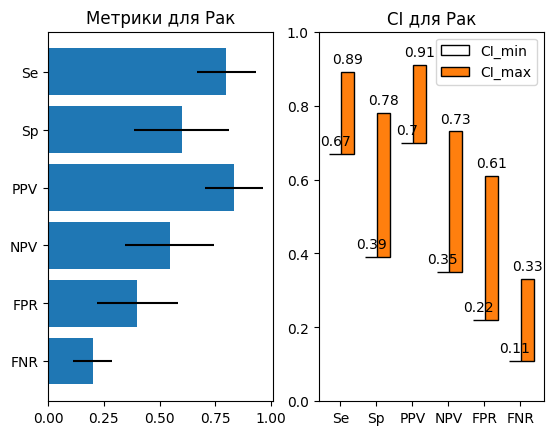

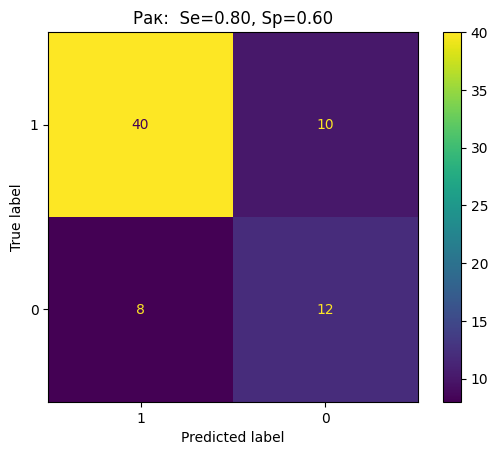

[array([0.8 , 0.48, 0.73, 0.59, 0.15, 0.03]), array([0.97, 0.85, 0.93, 0.94, 0.52, 0.2 ])]


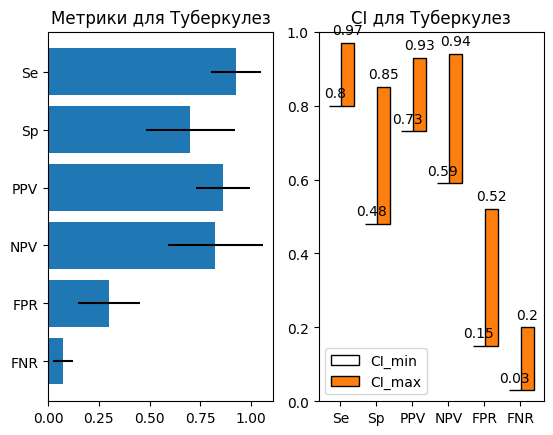

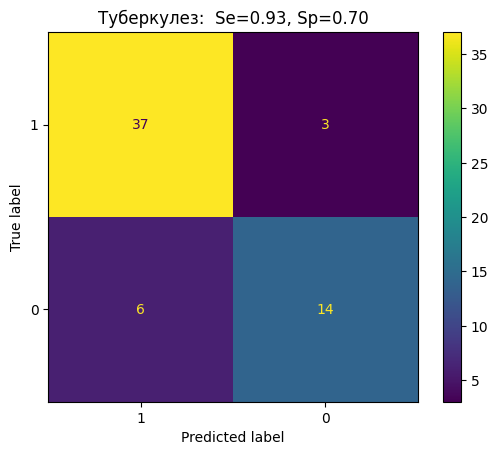

[array([0.67, 0.55, 0.81, 0.35, 0.07, 0.11]), array([0.89, 0.93, 0.98, 0.73, 0.45, 0.33])]


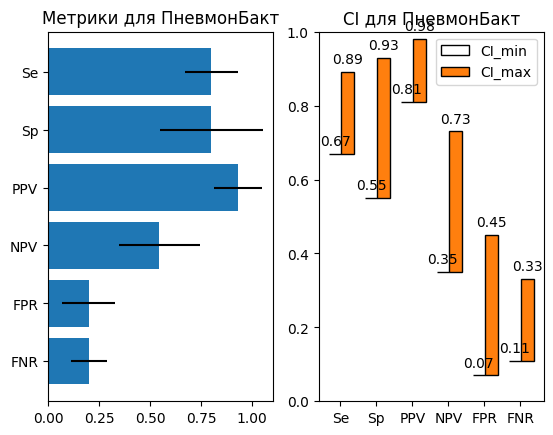

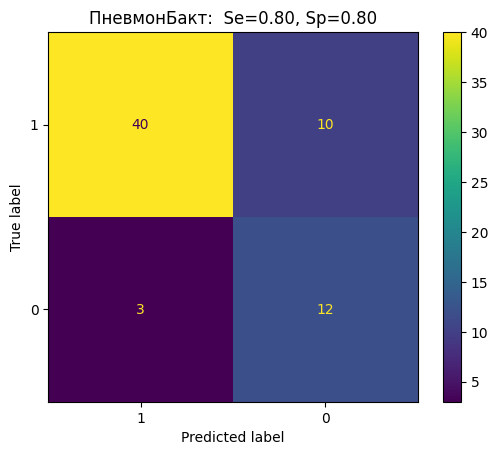

[array([0.74, 0.42, 0.78, 0.36, 0.15, 0.07]), array([0.93, 0.85, 0.95, 0.78, 0.58, 0.26])]


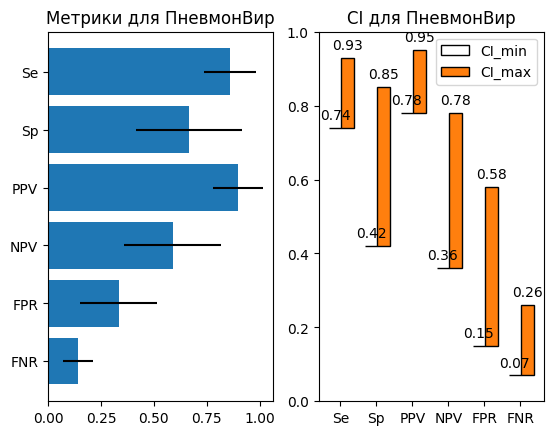

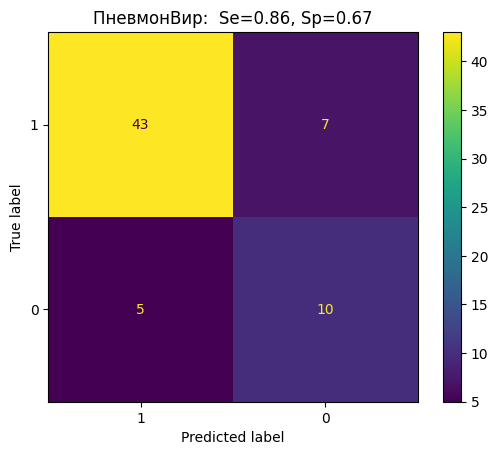

[array([0.84, 0.48, 0.77, 0.59, 0.15, 0.02]), array([0.98, 0.85, 0.95, 0.94, 0.52, 0.16])]


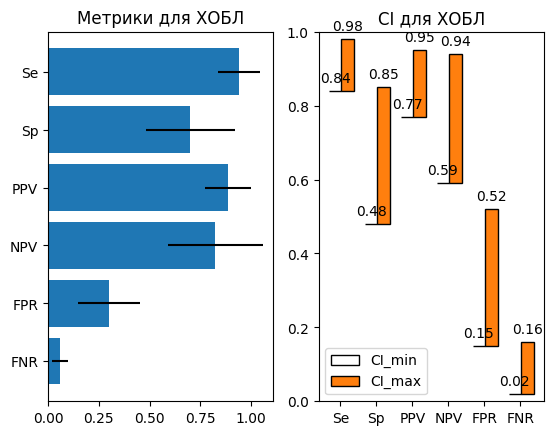

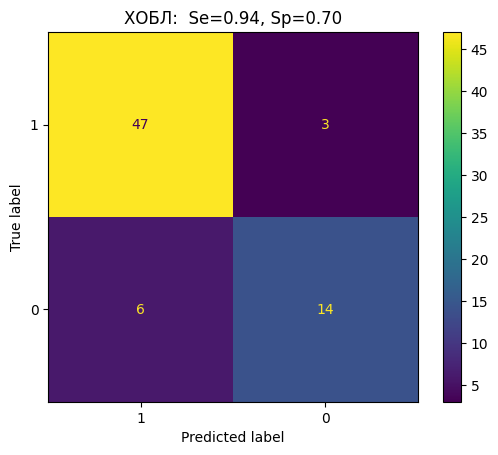

[array([0.74, 0.49, 0.82, 0.36, 0.06, 0.05]), array([0.95, 0.94, 0.99, 0.82, 0.51, 0.26])]


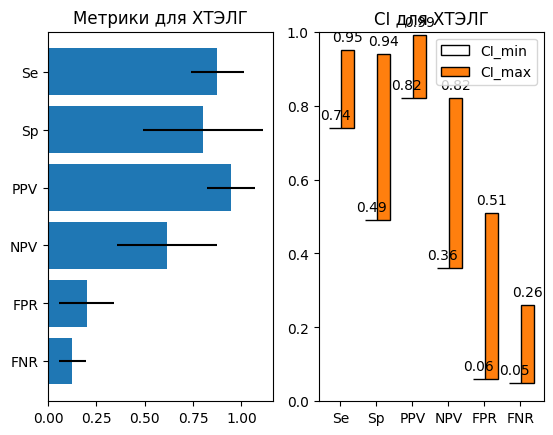

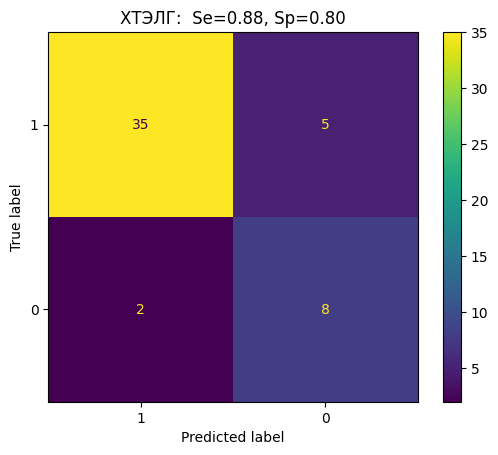

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import numpy
z = 1.96
cl = numpy.array([1, 0])
for d in DES:
  df_d = df.loc[df['desiase'] == d, 'fact']
  fact = df_d.to_numpy()
  df_p = df.loc[df['desiase'] == d, 'pred']
  pred = df_p.to_numpy()
  cm = confusion_matrix(fact, pred,labels=cl)
  A = cm[0][0]
  C = cm[0][1]
  B = cm[1][0]
  D = cm[1][1]
  Se = A/(A+C)
  Sp = D/(D+B)
  FPR = B/(B+D)
  FNR = C/(C+A)
  PPV = A/(A+B)
  NPV = D/(D+C)
  Se_min, Se_max = confidence_interval(Se, A+C, z)
  Sp_min, Sp_max = confidence_interval(Sp, D+B, z)
  FPR_min,FPR_max = confidence_interval(FPR, D+B, z)
  FNR_min,FNR_max = confidence_interval(FNR, C+A, z)
  PPV_min,PPV_max = confidence_interval(PPV, A+B, z)
  NPV_min,NPV_max = confidence_interval(NPV, D+C, z)
  Se_err  = Se - Se_min
  Sp_err  = Sp - Sp_min
  FPR_err = FPR - FPR_min
  FNR_err = FNR - FNR_min
  PPV_err = PPV - PPV_min
  NPV_err = NPV - NPV_min
  # Metrics data
  # fig, ax = plt.subplots(figsize=(12,12))
  fig = plt.figure()
  ax_1 = fig.add_subplot(1, 2, 1)
  ax_2 = fig.add_subplot(1, 2, 2)

  # fig, ax = plt.subplots()
  metrics = ('Se', 'Sp', 'PPV', 'NPV', 'FPR', 'FNR')
  y_pos = np.arange(len(metrics))
  performance = [Se, Sp, PPV, NPV, FPR, FNR]
  CI_min = [Se_min, Sp_min, PPV_min, NPV_min, FPR_min, FNR_min]
  CI_max = [Se_max, Sp_max, PPV_max, NPV_max, FPR_max, FNR_max]
  error = [Se_err, Sp_err, PPV_err, NPV_err, FPR_err, FNR_err]
  lower_error = np.around(CI_min,decimals=2)
  upper_error = np.around(CI_max,decimals=2)
  asymmetric_error = [lower_error, upper_error]
  print(asymmetric_error)

  # fig, ax = plt.subplots()
  hat_graph(ax_2, metrics, [lower_error, upper_error], ['CI_min', 'CI_max'])
  # Add some text for labels, title and custom x-axis tick labels, etc.
  # ax_2.set_xlabel('Games')
  # ax_2.set_ylabel('Score')
  ax_2.set_ylim(0, 1)
  ax_2.legend()

  ax_1.barh(y_pos, performance,
          xerr=error,
          align='center')
  ax_1.set_yticks(y_pos, labels=metrics)
  ax_1.invert_yaxis()  # labels read top-to-bottom
  ax_1.set_title('Метрики для ' + d)
  ax_2.set_title('CI для ' + d)
  # ax_2.scatter(metrics, CI_min)
  # ax_2.errorbar(metrics, performance, yerr=asymmetric_error, fmt='o')

  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cl)
  disp.plot()
  title = "{:s}:  Se={:.2f}, Sp={:.2f}".format(d,Sens[d],Spec[d])
  disp.ax_.set_title(title)
  plt.show()


# Моделируем по схеме Владимира Смирнова

In [18]:
DES = ['Рак','Туберкулез','ПневмонБакт','ПневмонВир','ХОБЛ','ХТЭЛГ','неБоленЭтими'] # нозологии конкурса
SIZE = [50, 40, 50, 50, 50, 40, 100] # размеры выборок по нозологиям
# технологические барьеры
SE = {
    'Рак': 0.86,
    'Туберкулез': 0.92,
    'ПневмонБакт': 0.90,
    'ПневмонВир': 0.92,
    'ХОБЛ': 0.86,
    'ХТЭЛГ': 0.84,
    'неБоленЭтими': 0.6
}
SP = {
    'Рак': 0.76,
    'Туберкулез': 0.82,
    'ПневмонБакт': 0.80,
    'ПневмонВир': 0.82,
    'ХОБЛ': 0.76,
    'ХТЭЛГ': 0.74,
    'неБоленЭтими': 0.6
}

In [19]:
# генерируем датасет испытаний
xml = []
i=0
for ds in DES:
  a = [ds] * SIZE[i]
  xml += a
  i += 1
N_xml = len(xml)
random.shuffle(xml) # перемешиваем случайно его, для последовательных извлечений xml и подачи на вход СППВР
print(len(xml), xml)

380 ['Туберкулез', 'неБоленЭтими', 'Рак', 'неБоленЭтими', 'Туберкулез', 'Рак', 'Туберкулез', 'ХОБЛ', 'ПневмонБакт', 'неБоленЭтими', 'неБоленЭтими', 'неБоленЭтими', 'Туберкулез', 'ПневмонВир', 'неБоленЭтими', 'ХОБЛ', 'Рак', 'неБоленЭтими', 'ПневмонВир', 'неБоленЭтими', 'ХОБЛ', 'ХОБЛ', 'неБоленЭтими', 'неБоленЭтими', 'неБоленЭтими', 'неБоленЭтими', 'Рак', 'ПневмонВир', 'неБоленЭтими', 'ХТЭЛГ', 'ХОБЛ', 'ХТЭЛГ', 'Рак', 'ХОБЛ', 'неБоленЭтими', 'ПневмонБакт', 'неБоленЭтими', 'ПневмонВир', 'ПневмонБакт', 'ХТЭЛГ', 'Рак', 'неБоленЭтими', 'неБоленЭтими', 'ХОБЛ', 'неБоленЭтими', 'неБоленЭтими', 'Рак', 'ХОБЛ', 'неБоленЭтими', 'неБоленЭтими', 'Туберкулез', 'ХОБЛ', 'ХТЭЛГ', 'ПневмонБакт', 'Рак', 'ПневмонВир', 'ХТЭЛГ', 'ПневмонБакт', 'ХТЭЛГ', 'ПневмонВир', 'ХОБЛ', 'неБоленЭтими', 'ПневмонБакт', 'ХТЭЛГ', 'ПневмонВир', 'ПневмонВир', 'ПневмонВир', 'ХТЭЛГ', 'ХТЭЛГ', 'ПневмонБакт', 'ХТЭЛГ', 'неБоленЭтими', 'ХОБЛ', 'ПневмонБакт', 'ХТЭЛГ', 'ПневмонВир', 'ПневмонВир', 'ХОБЛ', 'ПневмонБакт', 'неБоленЭтими', '

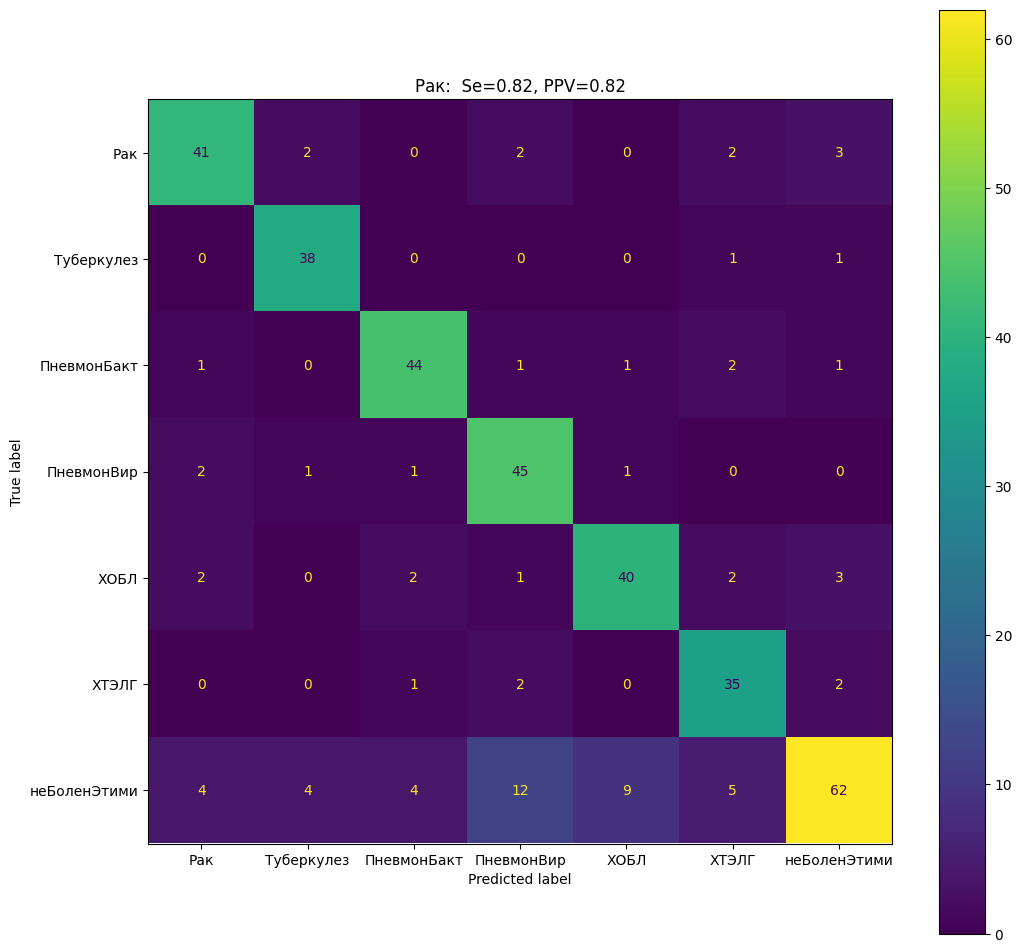

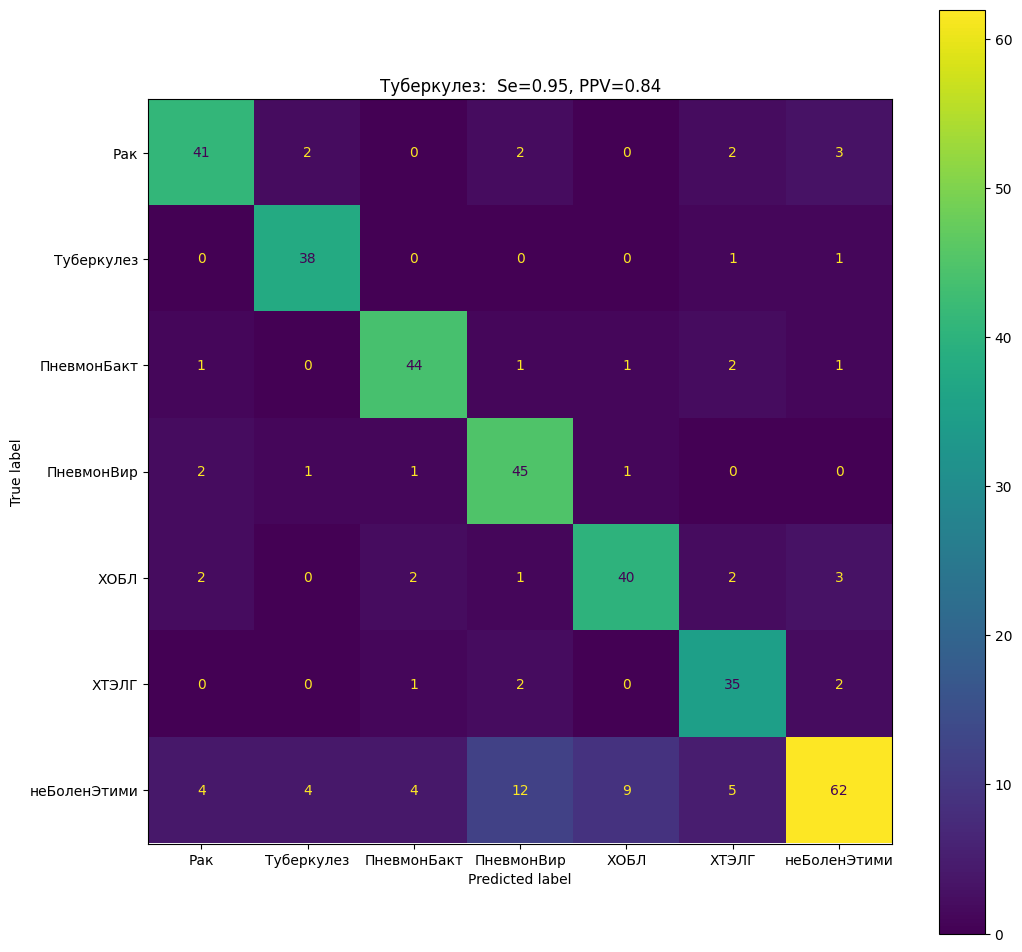

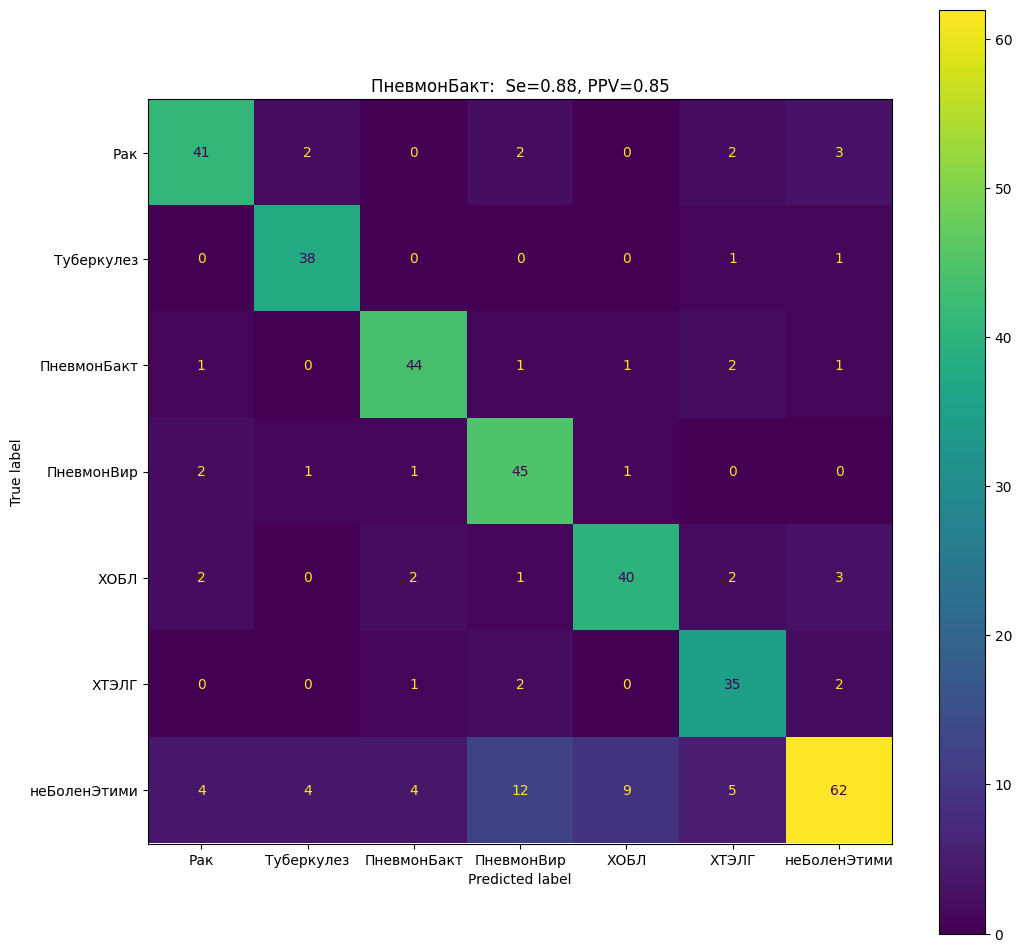

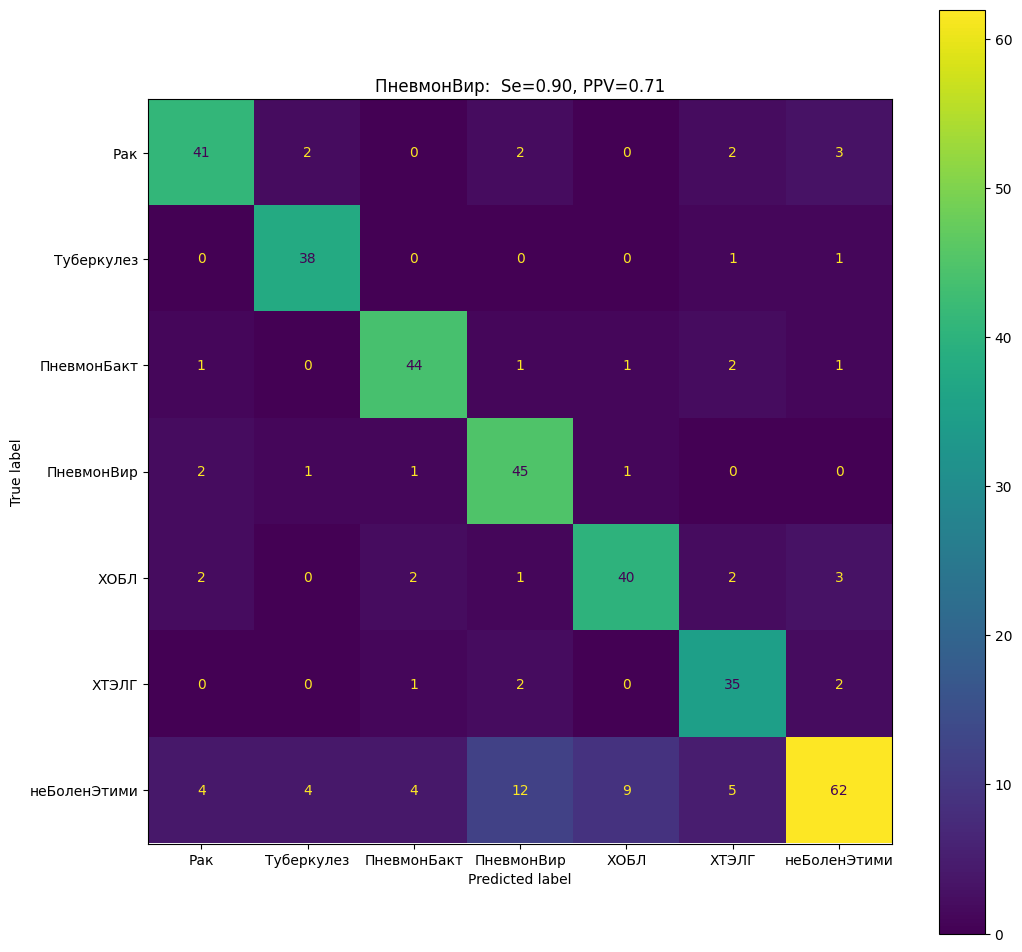

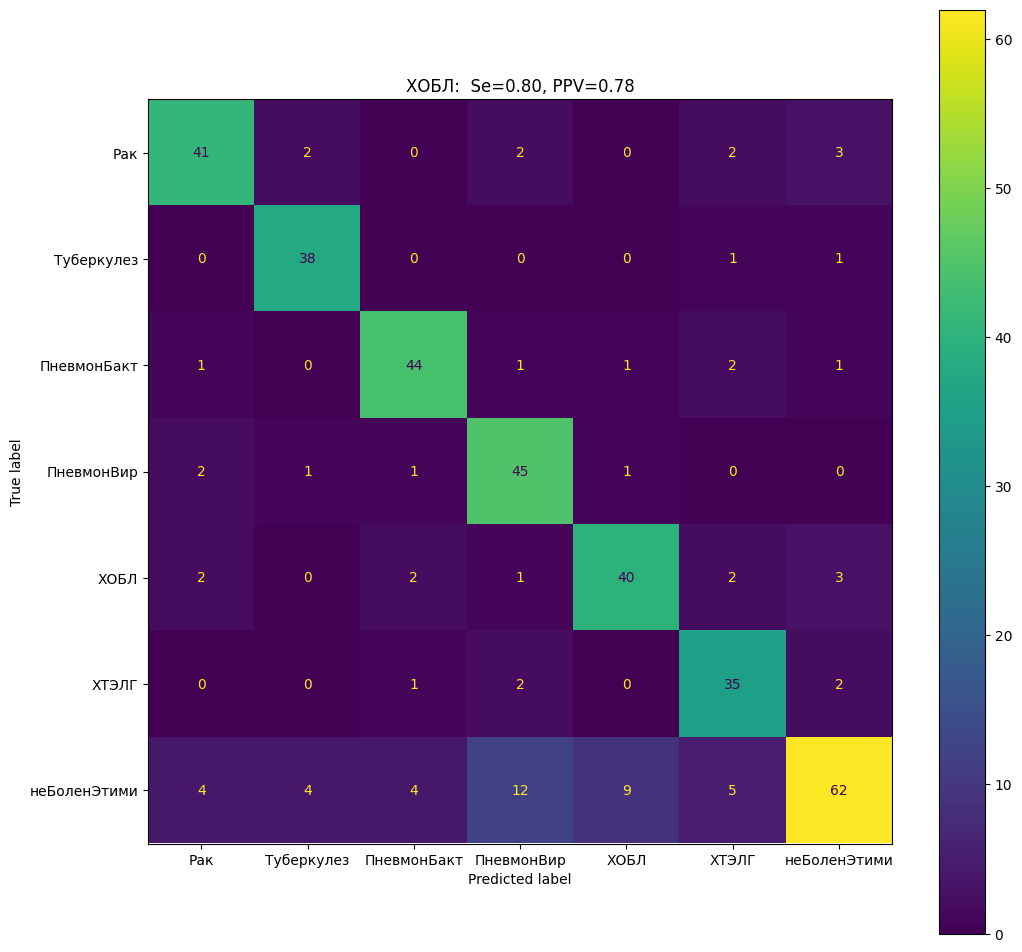

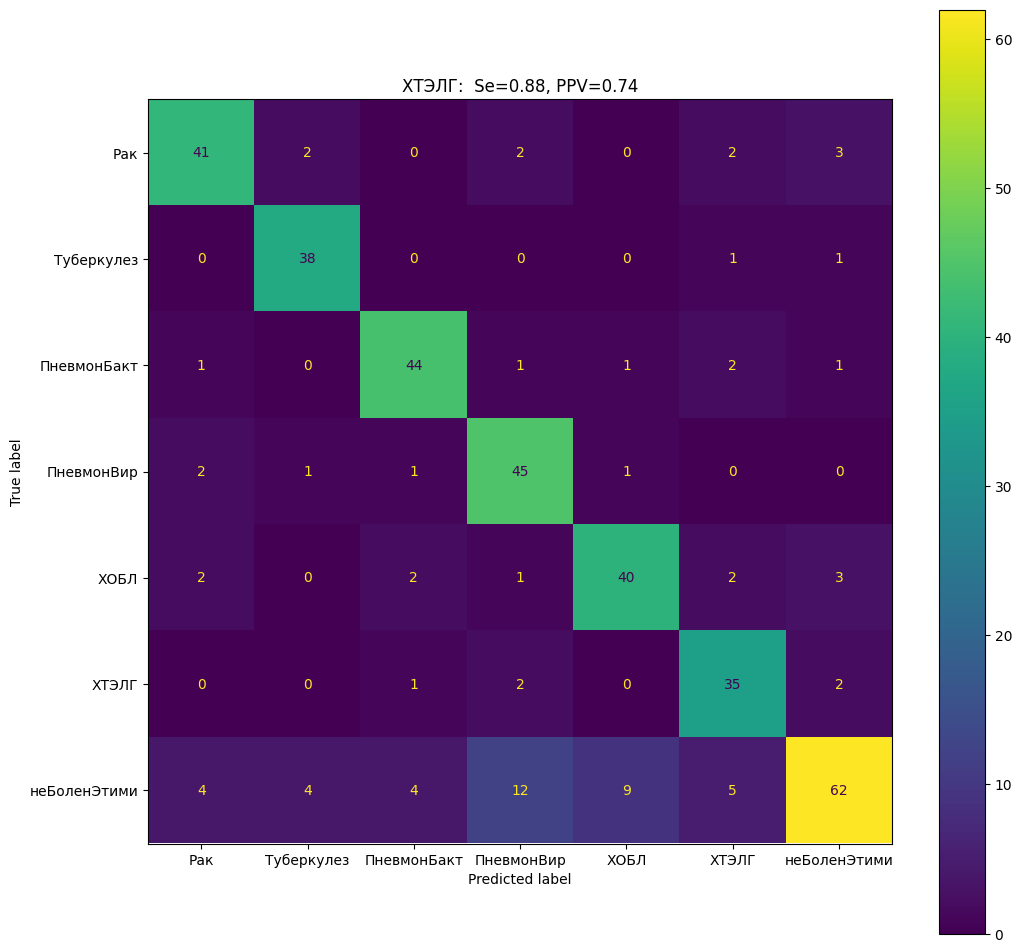

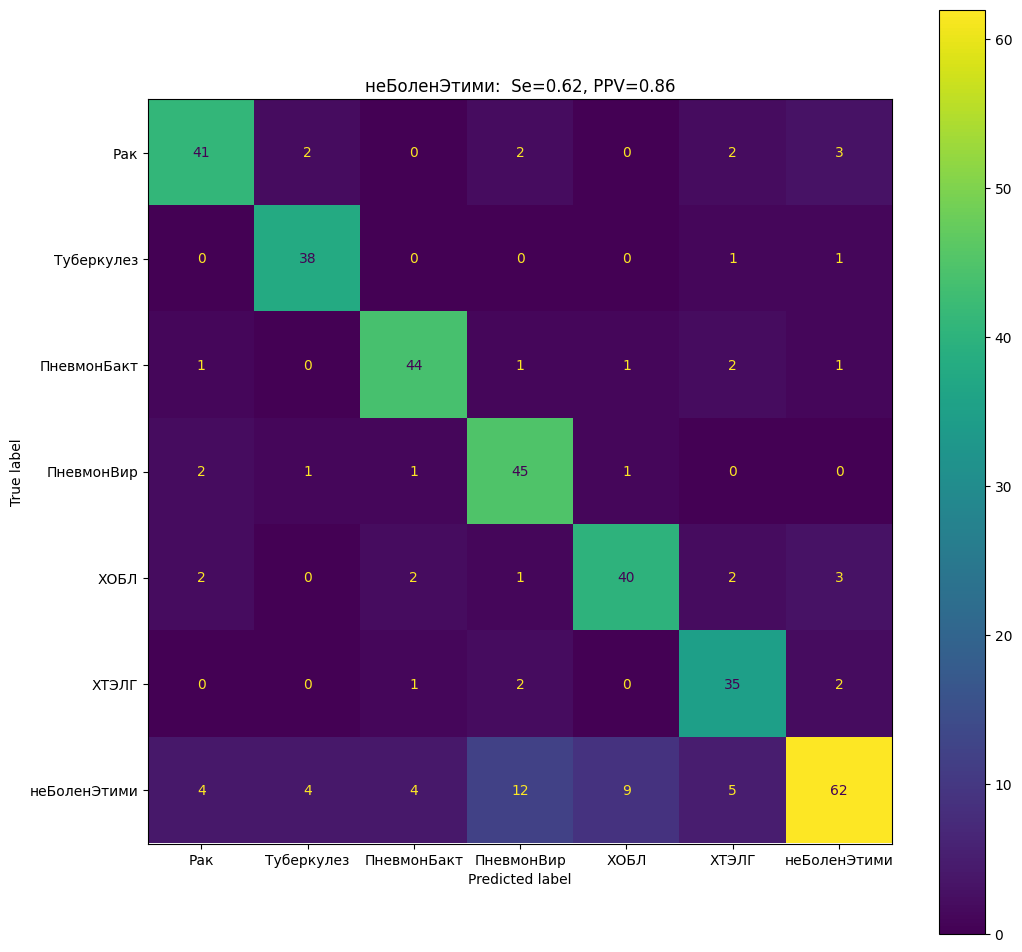

In [20]:
spvr = {
    'fact': [],
    'pred': []
}

for x in xml: # подаем на вход СППВР эпикризы из валидационного датасета XML
  se = SE.get(x)
  res = random.choices(['Верно', 'неВерно'], weights=[100*se, 100*(1-se)]) # моделируем вероятность выявления заболевания по чувствительности
  if res[0] == 'неВерно':
    xx = DES.copy()
    xx.remove(x) # удаляем TP нозологию и разыгрываем FN среди оставшихся
    random_index = random.randint(0, len(xx) - 1)
    # print(x,xx[random_index])
    spvr['pred'].append(xx[random_index])
    spvr['fact'].append(x)
  else:
    spvr['pred'].append(x)
    spvr['fact'].append(x)
df = pd.DataFrame(spvr)

i=0
for d in DES:
  df_f = df['fact']
  fact = df_f.to_numpy()
  df_p = df['pred']
  pred = df_p.to_numpy()
  cm = confusion_matrix(fact, pred,labels=DES)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DES)
  fig, ax = plt.subplots(figsize=(12,12))
  disp.plot(ax=ax)
  Sens[d] = cm[i][i]/sum(cm[i])
  cm_tr = cm.transpose()
  PPV = cm_tr[i][i]/sum(cm_tr[i])
  # title = "Нозология - {:s}  Чувствительность={:.2f} Специфичность={:.2f}".format(d,Sens[d],Spec[d])
  title = "{:s}:  Se={:.2f}, PPV={:.2f}".format(d,Sens[d],PPV)
  disp.ax_.set_title(title)
  plt.show()
  i += 1
